In [2]:
!pip install opencv-python

In [1]:
import cv2
import os
from utils.dataset_helper import *
import numpy as np

FOLDER = '../datasets/original'
OUTPUT = '../visualization'
CLASS = ['Pneumonia', 'GGO', 'Under']
SIZE = (1024, 1024)

In [2]:
import preprocessing
import matplotlib.pyplot as plt
import visualizer

In [3]:
names = getFilenames(FOLDER)
label_filename = [n[1] for n in names]
labels = getLabelList(label_filename)

In [4]:
METHOD = {
        'origin':{'method':"origin", 'iter':1, 'ker':1},
        'erosion':{'method':"erosion", 'iter':3, 'ker':5},
        'open':{'method':cv2.MORPH_OPEN, 'iter':5, 'ker':5},
        'close':{'method':cv2.MORPH_CLOSE, 'iter':5, 'ker':5},
        'grad':{'method':cv2.MORPH_GRADIENT, 'iter':5, 'ker':10},
        'tophat':{'method':cv2.MORPH_TOPHAT, 'iter':5, 'ker':10},
        'blackhat':{'method':cv2.MORPH_BLACKHAT, 'iter':5, 'ker':10}
        }

(2672, 2200)
Write into GGO000501
(2672, 2200)
Write into GGO000601
(2672, 2200)
Write into LLL010401
(2672, 2200)
Write into LLL010501
(3021, 3021)
Write into LLL010601
(2672, 2200)
Write into LLL010701


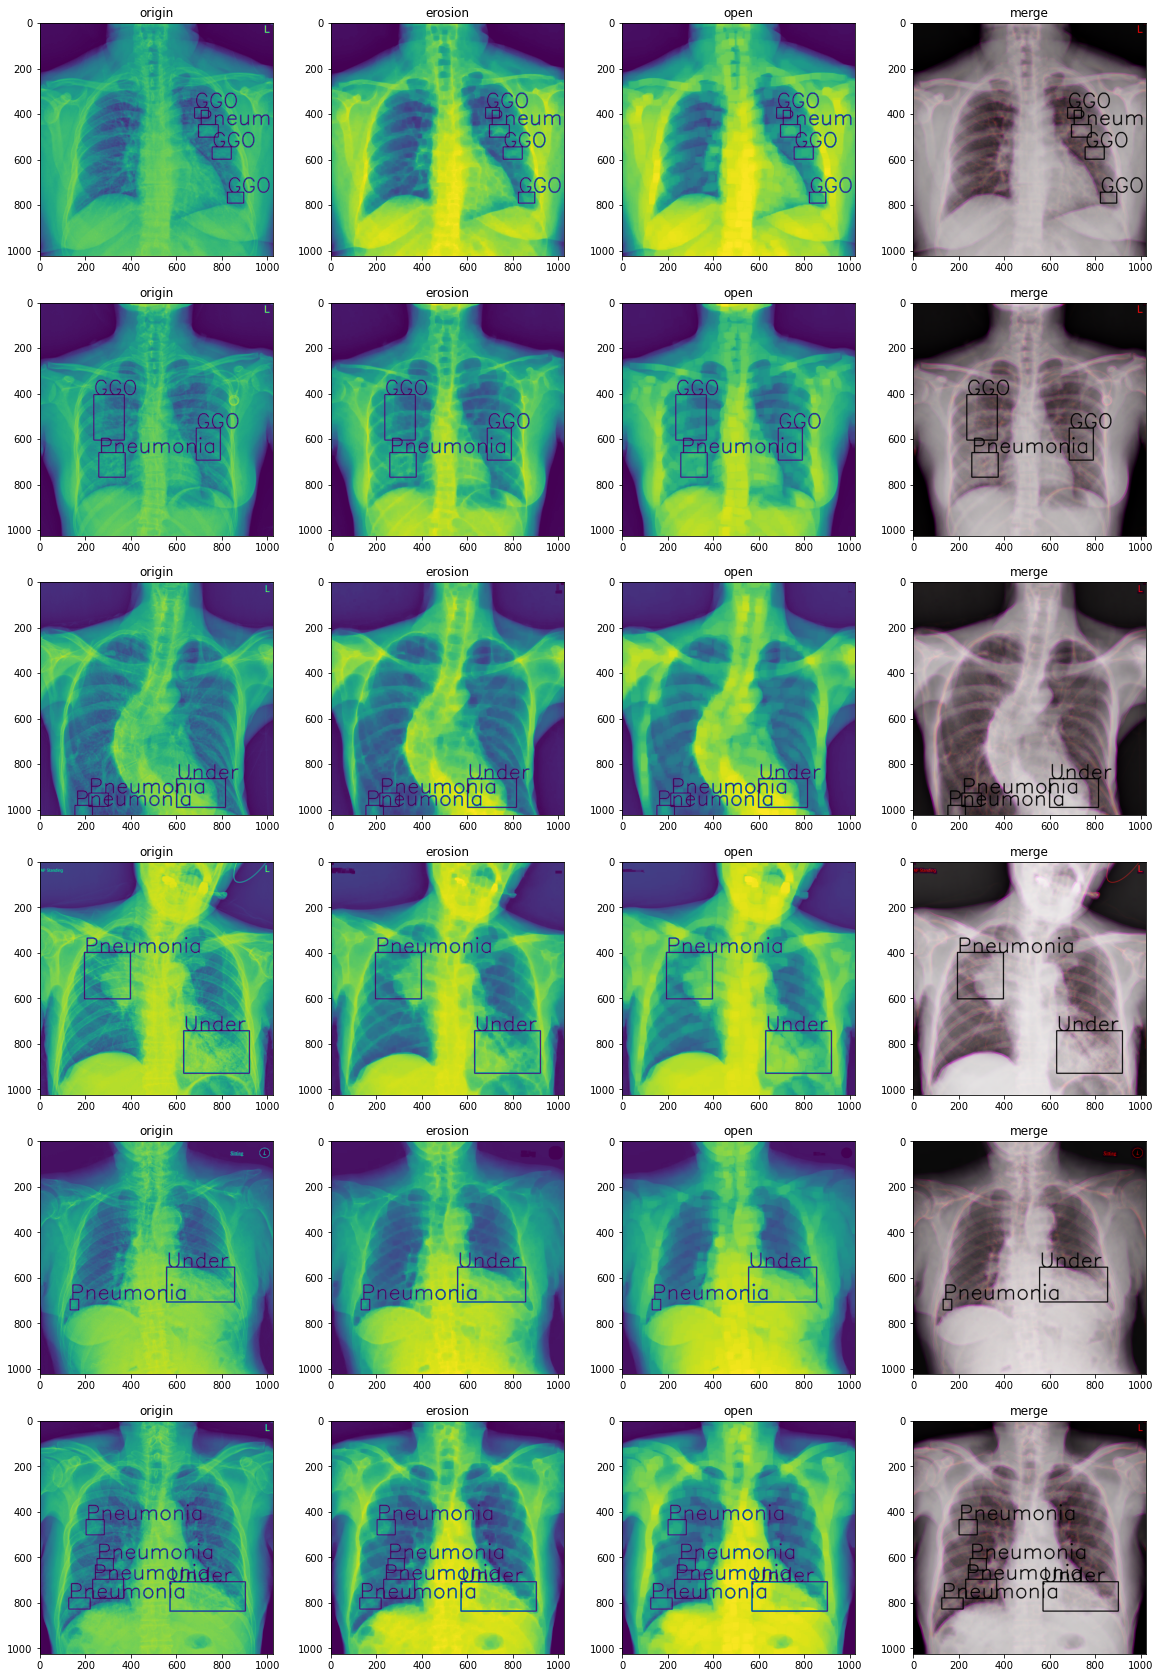

In [5]:
counter = 1
numOfImg = len(labels)

f = plt.figure(figsize=(20,numOfImg*20/4))
for name, label in zip(names, labels):
    # READ
    img = cv2.imread(name[0])
    filename = os.path.basename(name[0])
    h, w, c = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(img.shape)
    basename = os.path.splitext(os.path.basename(name[0]))[0]
    
    print("Write into " + basename)
    methods = ['origin', 'erosion', 'open']
    rows = 1 + len(methods)
    img, nlabel, offset = preprocessing.crop(img, label, SIZE)
    channels = []
    for method in methods:
        out = preprocessing.morpho(img, METHOD[method])
        channels.append(out)
        out = visualizer.visualize(out, nlabel)
        ax = f.add_subplot(numOfImg, rows, counter, title=method)
        ax.imshow(out)
        counter += 1
    
    merged = cv2.merge(channels)
    ax = f.add_subplot(numOfImg, rows, counter, title="merge")
    ax.imshow(merged)
    counter += 1
plt.show()